In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
dfx=pd.read_csv('xdata.csv')
dfy=pd.read_csv('ydata.csv')

In [57]:
x= dfx.values
y=dfy.values
print(x)
print(x.shape)
print(y.shape)

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]
(399, 3)
(399, 2)


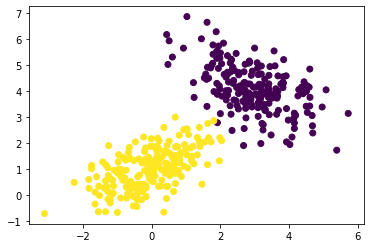

In [58]:
#we dont want 1st column so we are dropping first column
x = x[:,1:]
y = y[:,1:].reshape((-1,))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()


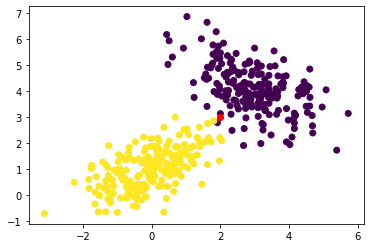

In [59]:
query_x = np.array([2,3])
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [60]:
def dist(x1,x2):
    return np.sqrt(sum(x1-x2)**2)

In [61]:
def knn(x,y,querypoint,k=5):
    vals=[]
    m = x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [62]:
knn(x,y,query_x)

(array([0.]), array([5], dtype=int64))


0.0

MNIST DATASET -collection of images of handwritten digits

In [63]:
df=pd.read_csv('train.csv')
print(df.shape)
print(df.columns)

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [64]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#creating a numpy array
data = df.values
print(data.shape , type(data))


(42000, 785) <class 'numpy.ndarray'>


In [66]:
x= data[:,1:]  #pixels i.e.,images
y=data[:,0] #labels ,i.e., which image or digit value of x corresponding to
print(x.shape,y.shape)

(42000, 784) (42000,)


In [67]:
#splitting of data into train(80%) and test(20%) 

split = int(0.8 * x.shape[0])  #how to extraxt just 80% of the data
print(split)

33600


In [68]:
x_train = x[:split,:]
y_train = y[:split]
x_test = x[split:,:]
y_test = y[split:]

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [69]:
def drawImg(sample):
    img= sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

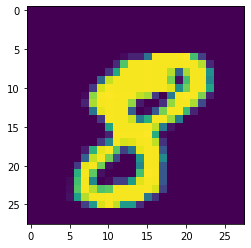

8


In [70]:
drawImg(x_train[10])
print(y_train[10])

In [71]:
pred=knn(x_train , y_train , x_test[0])
print(pred)

(array([5., 6., 7., 8.]), array([1, 2, 1, 1], dtype=int64))
6.0


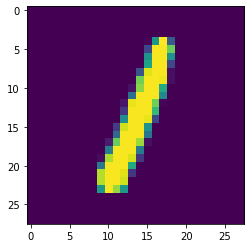

1


In [72]:
drawImg(x_test[200])
print(y_test[200])